# del Molino et al, eLife 2017

This jupyter notebook is a walk-through on how to reproduce the main findings from [del Molino et al. 2017](https://cdn.elifesciences.org/articles/29742/elife-29742-v2.pdf) using NeuroML2/LEMS. 


Note: The results presented here and those in the paper are different by a factor of tau. As in the code implemented by the paper the dynamics equations are defined as:

$\frac{dr_i}{dt} = -r_i + f(V_i)$

In [1]:
from __future__ import division

## Microcircuit Conenctivity

Illustration of the how the cell populations of interest are connected among each other. 

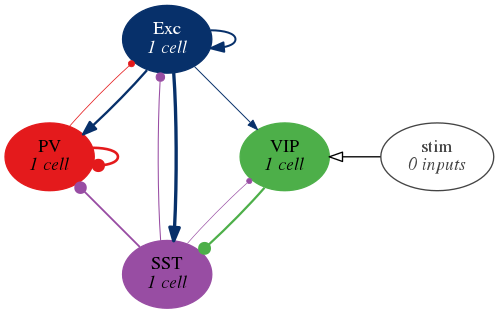

In [2]:
from IPython.display import Image,display
display(Image("../NeuroML/Fig1/Fig1a.png"))

populations = ['exc', 'pv', 'sst', 'vip']
colours = ['blue', 'red', 'darkorchid', 'green']

## Response to Top-down Modulation

To study the response of a top-down modulation on the network the authors studied the circuit response for different baseline activities of the network. As illustrated below, when the baseline is low the the modulation will result in a decrease in of SST rate and incrase of the other populations. A high baseline rate, on the other hand, leads to an increase in modulation for all populations.

### Low Baseline Activity

pyNeuroML >>> Reloading data specified in LEMS file: ../NeuroML/Fig1/LEMS_RateBased_low_baseline.xml (C:\Users\user\Documents\neuroml\del-Molino2017-master\NeuroML\Fig1\LEMS_RateBased_low_baseline.xml), base_dir: ., cwd: C:\Users\user\Documents\neuroml\del-Molino2017-master\notebooks


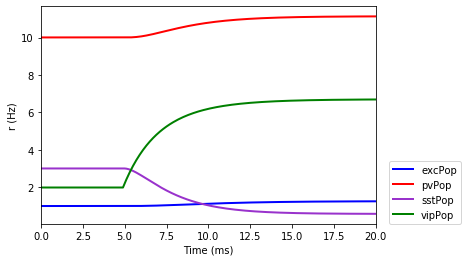

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline  
from pyneuroml import pynml

low_lems_file='../NeuroML/Fig1/LEMS_RateBased_low_baseline.xml'
low_results = pynml.run_lems_with_jneuroml(low_lems_file, nogui=True, load_saved_data=True, plot=False);

# t=0 corresponds to the time point of the modulatory input
T = max(low_results['t']) * 1000
timeLine = [t * 1000 - T/4 + 5 for t in low_results['t']]
for population_idx, population in enumerate(populations):
    pop = '%sPop' %population
    plt.plot(timeLine, low_results[pop + '[0]/r'], label=pop, color=colours[population_idx], linewidth=2)

plt.xlabel('Time (ms)')
plt.ylabel('r (Hz)')
plt.xlim(xmin=0, xmax=20)
plt.legend(loc=(1.04,0))

### High Baseline Activity

pyNeuroML >>> Reloading data specified in LEMS file: ../NeuroML/Fig1/LEMS_RateBased_high_baseline.xml (C:\Users\user\Documents\neuroml\del-Molino2017-master\NeuroML\Fig1\LEMS_RateBased_high_baseline.xml), base_dir: ., cwd: C:\Users\user\Documents\neuroml\del-Molino2017-master\notebooks


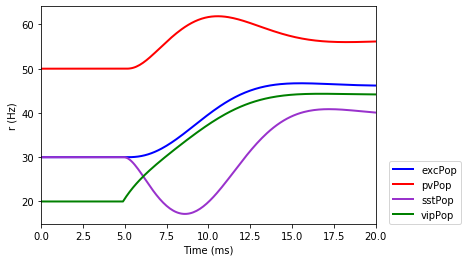

In [4]:
high_lems_file='../NeuroML/Fig1/LEMS_RateBased_high_baseline.xml'
high_results =  pynml.run_lems_with_jneuroml(high_lems_file, nogui=True, load_saved_data=True, plot=False);

# t=0 corresponds to the time point of the modulatory input
T = max(high_results['t']) * 1000
timeLine = [t * 1000 - T/4 + 5 for t in high_results['t']]
for population_idx, population in enumerate(populations):
    pop = '%sPop' %population
    plt.plot(timeLine, high_results[pop + '[0]/r'], label=pop, color=colours[population_idx], linewidth=2)

plt.xlabel('Time (ms)')
plt.ylabel('r (Hz)')
plt.xlim(xmin=0, xmax=20)
plt.legend(loc=(1.04,0))

## f-I Curve

The code below calculates the tuning curve for the different populations both in the low as well as in the high baseline scenario. While in the low baseline scenario all populations (represented by the dots on the plot) are below the threshold, in the high baseline scenerio all populations are above the threshold.

pyNeuroML >>> Reloading data specified in LEMS file: ../NeuroML/Fig2/LEMS_fISim_exc.xml (C:\Users\user\Documents\neuroml\del-Molino2017-master\NeuroML\Fig2\LEMS_fISim_exc.xml), base_dir: ., cwd: C:\Users\user\Documents\neuroml\del-Molino2017-master\notebooks
pyNeuroML >>> Reloading data specified in LEMS file: ../NeuroML/Fig1/LEMS_RateBased_low_baseline.xml (C:\Users\user\Documents\neuroml\del-Molino2017-master\NeuroML\Fig1\LEMS_RateBased_low_baseline.xml), base_dir: ., cwd: C:\Users\user\Documents\neuroml\del-Molino2017-master\notebooks

pyNeuroML >>> Reloading data specified in LEMS file: ../NeuroML/Fig2/LEMS_fISim_pv.xml (C:\Users\user\Documents\neuroml\del-Molino2017-master\NeuroML\Fig2\LEMS_fISim_pv.xml), base_dir: ., cwd: C:\Users\user\Documents\neuroml\del-Molino2017-master\notebooks
pyNeuroML >>> Reloading data specified in LEMS file: ../NeuroML/Fig1/LEMS_RateBased_low_baseline.xml (C:\Users\user\Documents\neuroml\del-Molino2017-master\NeuroML\Fig1\LEMS_RateBased_low_baseline.x

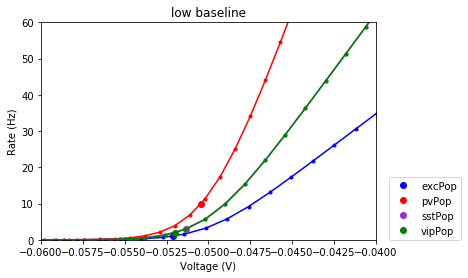

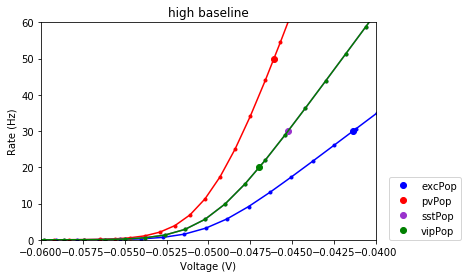

In [5]:
import numpy as np
n_units = 20
baselines = ['low', 'high']

r = {}
v = {}
for baseline in baselines:
    plt.figure()
    for population_idx, population in enumerate(populations):
        lems_file = '../NeuroML/Fig2/LEMS_fISim_%s.xml' %population
        # Run simulation
        # cleanup: remove the .dat file after loading them
        results = pynml.run_lems_with_jneuroml(lems_file, nogui=True, load_saved_data=True, plot=False);
        # get the last values of the simulation and plot the fI Curve

        r[population] = np.zeros((n_units))
        v[population] = np.zeros((n_units))
        for unit in range(n_units):
            pop_unit_r = '%sPop[%d]/r' %(population, unit)
            pop_unit_V = '%sPop[%d]/V' %(population, unit)
            r[population][unit] = results[pop_unit_r][-1]
            v[population][unit] = results[pop_unit_V][-1]

        plt.plot(v[population], r[population], marker='.', color=colours[population_idx])

        # load the low_baseline results and plot them on the fI curve
        baseline_lems_file = '../NeuroML/Fig1/LEMS_RateBased_%s_baseline.xml' %baseline
        results_baseline = pynml.run_lems_with_jneuroml(baseline_lems_file, nogui=True, load_saved_data=True, plot=False);
        population_v = '%sPop[0]/V' %population
        population_r = '%sPop[0]/r' %population
        # Note: I am taking the first time point as at time point 0 the membrane voltage has not yet reached the baseline
        #  activity steady-state
        pop = '%sPop' %population
        plt.plot(results_baseline[population_v][1], results_baseline[population_r][1], 'o', label=pop, color=colours[population_idx])
        print('')

        plt.xlabel('Voltage (V)')
        plt.ylabel('Rate (Hz)')
        plt.xlim(-.060, -.040)
        plt.ylim(0, 60)
        plt.title('{} baseline'.format(baseline))
        plt.legend(loc=(1.04,0))
        plot_name = 'fI_%s_baseline.png' %baseline

## Random Network Model

The next simulations are done with multiple units from each population. The image below illustrates the network under analysis (Blue: E units, Red: PV units, Purple: SST, Green: VIP). 

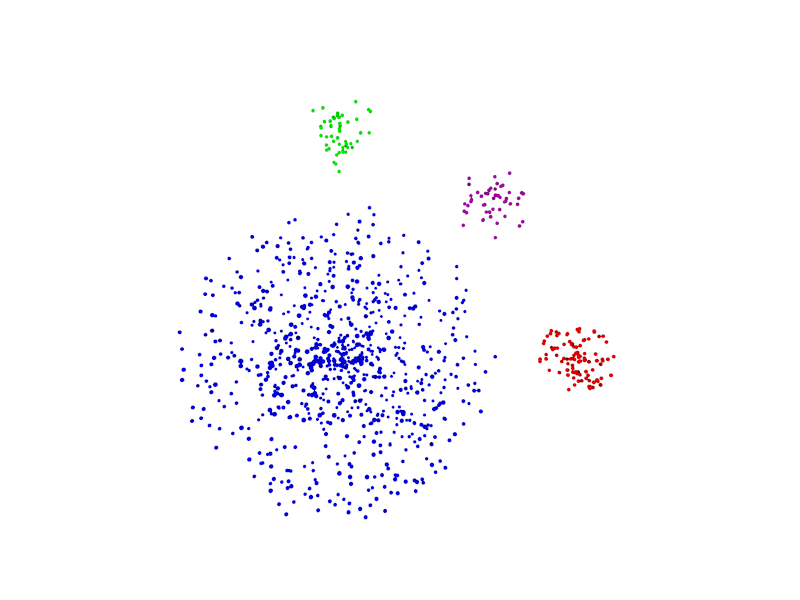

In [6]:
Image("../NeuroML/Fig3/RandomPopulationRate_high_baseline.nml36.png")

In [7]:
# General settings for the Population analysis
# Define the number of units in each population
n_pops = [800, 100, 50, 50]
units = ['exc', 'pv', 'sst', 'vip']

Note: Before runing the next lines make sure you have run both scripts `run_neuron_high_base_rate.sh` and `run_neuron_low_base_rate.sh` on the `NeuroML/Fig3` folder.


In [8]:
# Load simulation
lems_low_file = '../NeuroML/Fig3/LEMS_PopulationSimlowBaseline.xml'
results_low = pynml.reload_saved_data(lems_low_file, 
                      base_dir = '.',
                      plot = False, 
                      show_plot_already = False, 
                      simulator = None, 
                      reload_events = False, 
                      verbose = False) 

lems_high_file = '../NeuroML/Fig3/LEMS_PopulationSimhighBaseline.xml'
results_high = pynml.reload_saved_data(lems_high_file,
                      base_dir = '.',
                      plot = False, 
                      show_plot_already = False, 
                      simulator = None, 
                      reload_events = False, 
                      verbose = False) 

# Settings for the filled plot
# Define colours for the filled in area
lcolours = ['#588ef3', '#f35858', '#bd58f3', '#2f940a']
def plt_filled_std(ax, data, t, color):
    est = np.mean(data, axis=1)
    sd = np.std(data, axis=1)
    # calculate upper and lower bounds of the plot
    cis = (est - sd, est + sd)
    # plot filled area
    ax.fill_between(t, cis[0],cis[1],alpha=0.2, color=color)
    # plot mean
    ax.plot(t, est, color=color, linewidth=2)
    ax.margins(x=0)

pyNeuroML >>> Reloading data specified in LEMS file: ../NeuroML/Fig3/LEMS_PopulationSimlowBaseline.xml (/Users/jessica/Code/GSoC/osb/del-Molino2017/NeuroML/Fig3/LEMS_PopulationSimlowBaseline.xml), base_dir: ., cwd: /Users/jessica/Code/GSoC/osb/del-Molino2017/notebooks
pyNeuroML >>> Reloading data specified in LEMS file: ../NeuroML/Fig3/LEMS_PopulationSimhighBaseline.xml (/Users/jessica/Code/GSoC/osb/del-Molino2017/NeuroML/Fig3/LEMS_PopulationSimhighBaseline.xml), base_dir: ., cwd: /Users/jessica/Code/GSoC/osb/del-Molino2017/notebooks


### Low Baseline Activity

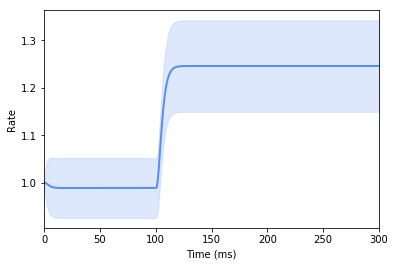

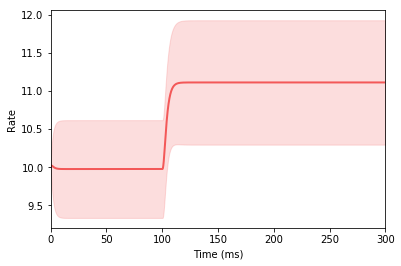

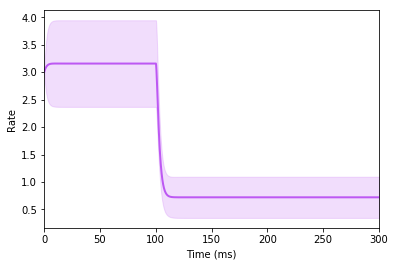

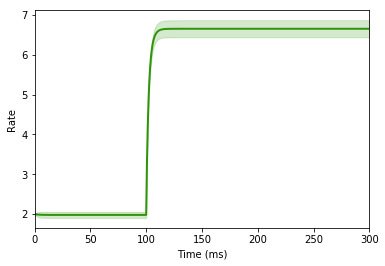

In [9]:
# Iterate over all 4 popualtions, save the results and plot the mean and standard deviation acrate activity
# for each population
for pop_idx, pop in enumerate(units):
    fig, ax = plt.subplots(1)
    plt.xlabel('Time (ms)')
    plt.ylabel('Rate')
    # calulate time in ms
    t = np.multiply(results_low['t'], 1000)
    pop_data = np.zeros((len(results_low['t']), n_pops[pop_idx]))
    
    for n_pop in range(n_pops[pop_idx]):
        pop_unit =  '%sPop/%d/%s/r' %(pop, n_pop, pop.upper())
        pop_data[:, n_pop] = results_low[pop_unit]
    plt_filled_std(ax, pop_data, t, lcolours[pop_idx])

### High Baseline Activity

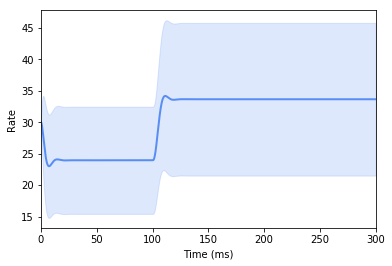

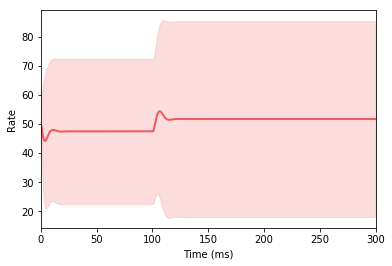

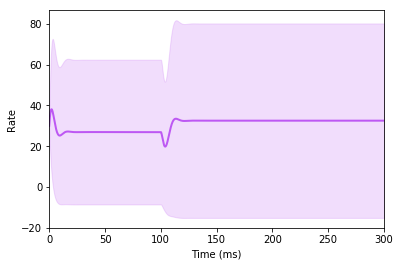

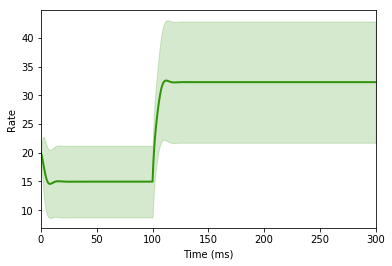

In [10]:
# Iterate over all 4 popualtions, save the results and plot the mean and standard deviation acrate activity
# for each population
for pop_idx, pop in enumerate(units):
    fig, ax = plt.subplots(1)
    plt.xlabel('Time (ms)')
    plt.ylabel('Rate')
    pop_data = np.zeros((len(results_high['t']), n_pops[pop_idx]))
    t = np.multiply(results_high['t'], 1000)
    
    for n_pop in range(n_pops[pop_idx]):
        pop_unit =  '%sPop/%d/%s/r' %(pop, n_pop, pop.upper())
        pop_data[:, n_pop] = results_high[pop_unit]
    plt_filled_std(ax, pop_data, t, lcolours[pop_idx])

### Rate Modulation

The Rate Modulation is defined as the rate after the onset of the modulation (index_300ms) minus the baseline rate (index_99). If a rate modulation is positive it means that the neuron is more active in the presence of the modulatory current.

As in the delMolino paper the SST cells are the only population with negative rate modulation.

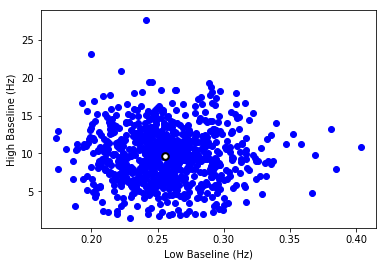

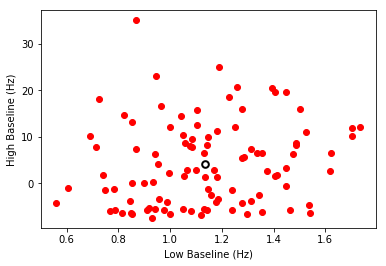

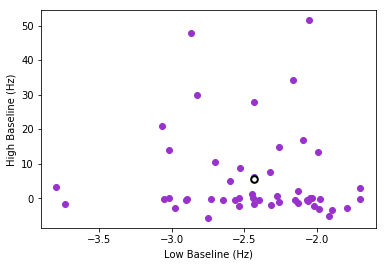

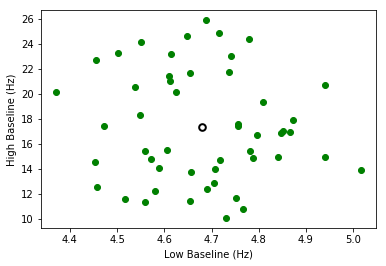

In [11]:
for pop_idx, pop in enumerate(units):
    avg_pop_high = 0
    avg_pop_low = 0
    pop_high = []
    pop_low = []
    plt.figure()
    plt.xlabel('Low Baseline (Hz)')
    plt.ylabel('High Baseline (Hz)')
    index_99_9ms = 999
    index_300ms = 3000
    for n_pop in range(n_pops[pop_idx]):
        pop_unit = '%sPop/%d/%s/r' %(pop, n_pop, pop.upper())
        # plot rate modulation. Plot the rate at the end the modulatory current (at 300ms) minus the baseline
        # rate, i.e. just before stimulation onset, 99.9ms)
        rate_modulation_low = results_low[pop_unit][index_300ms] - results_low[pop_unit][index_99_9ms]
        rate_modulation_high = results_high[pop_unit][index_300ms] - results_high[pop_unit][index_99_9ms]
        plt.plot(rate_modulation_low, rate_modulation_high, 'o', color=colours[pop_idx], zorder=1)
        avg_pop_low =+ rate_modulation_low
        avg_pop_high =+ rate_modulation_high
        pop_low.append(rate_modulation_low)
        pop_high.append(rate_modulation_high)
    plt.scatter(np.mean(pop_low), np.mean(pop_high), marker='o', c='w', edgecolors='k', linewidths=2, zorder=2,s=44)
    